In [1]:
# Imports
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization

In [2]:
# Verify the version tensorflow
print(tf.__version__)

2.15.0


In [3]:
# Loading the dataset
Cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = Cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Defining the label classes in the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

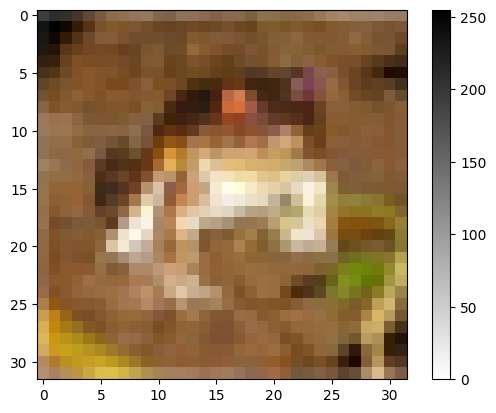

Class ID: [6] and Class name: Frog


In [5]:
# не обовязковий параметр
# Inspect the data in the array
index = 0
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.colorbar()
plt.show()
print("Class ID: %s and Class name: %s" % (y_train[index], class_names[y_train[index][0]]))

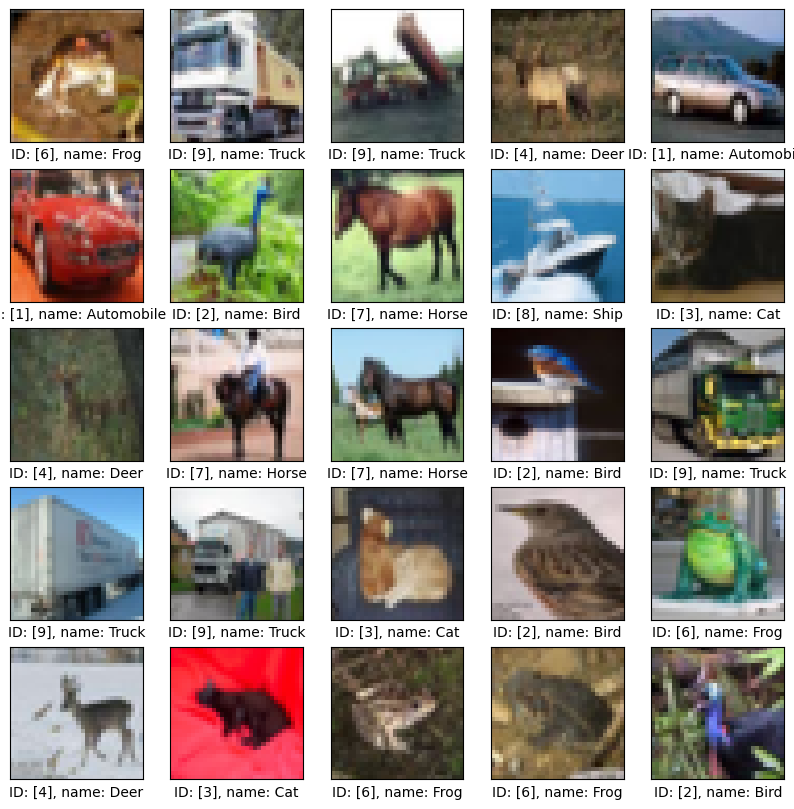

In [6]:
# Verify the data by display the first 25 images from traing set
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel("ID: %s, name: %s" % (y_train[i], class_names[y_train[i][0]]))
plt.show()

In [7]:
# Pixel value of the image normalizing between 0 to 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

In [8]:
# One hot encoding of the labels
num_classes = 10
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [9]:
# Define the Convolutional Neural Network
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
# model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden_1'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', name='hidden_2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='predictions'))

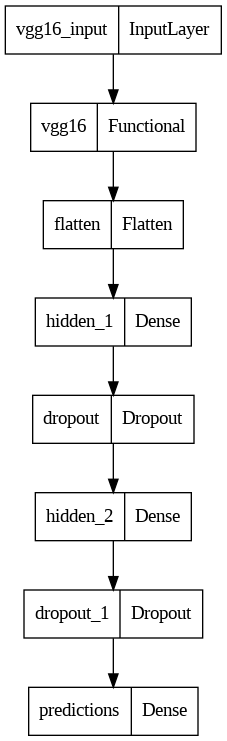

In [11]:
# Plot model graph
plot_model(model, 'model.png')

In [12]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model with an EarlyStopping and ModelCheckpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

filepath = "weights.h5"
model_checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')

callbacks_list = [early_stopping, model_checkpoint]

In [14]:
# Training model
history = model.fit(
    x_train, y_train, epochs=100, verbose=1, batch_size=128, validation_split=0.2, callbacks=callbacks_list
)

Epoch 1/100
313/313 [==============================] - 15s 28ms/step - loss: 1.4592 - accuracy: 0.4847 - val_loss: 1.2453 - val_accuracy: 0.5619
Epoch 2/100
  1/313 [..............................] - ETA: 5s - loss: 1.3620 - accuracy: 0.4922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 20ms/step - loss: 1.2304 - accuracy: 0.5662 - val_loss: 1.1858 - val_accuracy: 0.5829
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 1.1550 - accuracy: 0.5933 - val_loss: 1.1615 - val_accuracy: 0.5892
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 1.0993 - accuracy: 0.6136 - val_loss: 1.1378 - val_accuracy: 0.6008
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 1.0618 - accuracy: 0.6283 - val_loss: 1.1236 - val_accuracy: 0.6036
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 1.0184 - accuracy: 0.6427 - val_loss: 1.1050 - val_accuracy: 0.6178
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.9876 - accuracy: 0.6520 - val_loss: 1.1062 - val_accuracy: 0.6190
Epoch 8/100
313/313 [==============================] - 6s 21ms/step - loss: 0.9544 - accuracy: 0.6658 - val_loss: 1.0968 - val_accuracy: 0.6231
Epoc

In [15]:
# Show results
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 3s 8ms/step - loss: 1.2293 - accuracy: 0.6191
[1.229333758354187, 0.6190999746322632]


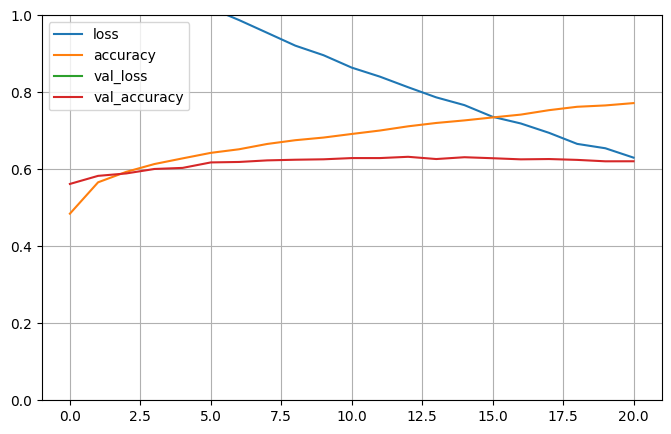

In [16]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
# Show model layers
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [18]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True


layer_list = ["block4_conv1", "block5_conv1"]
for layer in conv_base.layers:
    if layer.name in layer_list:
        set_trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [19]:
# Compile and training model
modified_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = modified_model.fit(
    x_train, y_train, epochs=20, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/20
313/313 [==============================] - 14s 33ms/step - loss: 1.0439 - accuracy: 0.6339 - val_loss: 0.8277 - val_accuracy: 0.7090
Epoch 2/20
313/313 [==============================] - 9s 30ms/step - loss: 0.7017 - accuracy: 0.7555 - val_loss: 0.6883 - val_accuracy: 0.7594
Epoch 3/20
313/313 [==============================] - 9s 30ms/step - loss: 0.5971 - accuracy: 0.7923 - val_loss: 0.6712 - val_accuracy: 0.7656
Epoch 4/20
313/313 [==============================] - 9s 30ms/step - loss: 0.5201 - accuracy: 0.8188 - val_loss: 0.6630 - val_accuracy: 0.7756
Epoch 5/20
313/313 [==============================] - 10s 30ms/step - loss: 0.4512 - accuracy: 0.8444 - val_loss: 0.6310 - val_accuracy: 0.7832
Epoch 6/20
313/313 [==============================] - 9s 30ms/step - loss: 0.3967 - accuracy: 0.8624 - val_loss: 0.6532 - val_accuracy: 0.7789
Epoch 7/20
313/313 [==============================] - 9s 30ms/step - loss: 0.3380 - accuracy: 0.8842 - val_loss: 0.5862 - val_accuracy: 0.79

In [20]:
# Show results
results = modified_model.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results[1] * 100, 1)}%')

313/313 [==============================] - 3s 8ms/step - loss: 1.0608 - accuracy: 0.7974
відсоток вірних відповідей - 79.7%


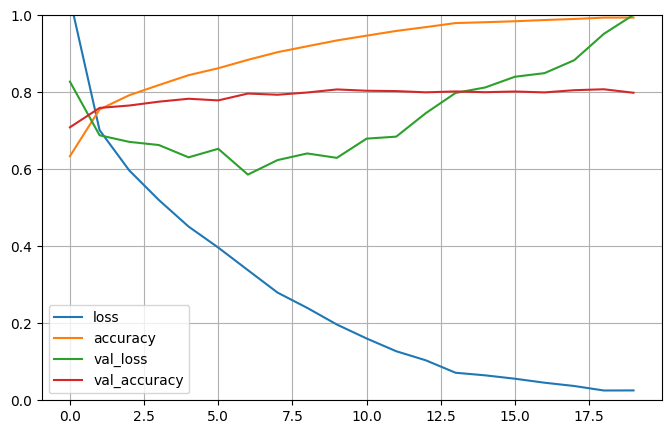

In [21]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
# Save model
#modified_model.save("weights.h5")